# OpenET RADET
## Image Class Property/Method Example
This example shows how to instantiate the model Image class for a single Landsat image using the ".from_landsat_c1_sr()" helper method.  This example also shows how to get the model variables.

## Setup

In [ ]:
%pip install earthengine-api openet-core pandas seaborn openet-sims openet-ptjpl openet-ssebop openet-disalexi openet-geesebal

In [1]:
import ee
from IPython.display import Image

import os
from pathlib import Path
# Get the notebook's directory and derive repo root
NOTEBOOK_DIR = Path(globals()['__vsc_ipynb_file__']).resolve().parent
REPO_ROOT = NOTEBOOK_DIR.parent
os.chdir(REPO_ROOT)

import radet as model

### Initialize Earth Engine

In [2]:
# Initialize the Earth Engine package, initiating the authentication flow if needed.
try:
    ee.Initialize()
    
except ee.EEException:
    ee.Authenticate()
    ee.Initialize()

## Analysis

In [3]:
ndvi_palette = [
    '#0010FF','#1020FF','#2030FF','#3040FF','#4050FF','#5060FF','#6070FF',
    '#7080FF','#8090FF','#90A0FF','#A0B0FF','#B0C0FF','#C0D0FF','#D0E0FF',
    '#E0F0FF','#F0FFFF',
    'ffffff',
    'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
    '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
    '012e01', '011d01', '011301']
#et_palette = [
#    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
#    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
et_palette = [
    '4A2C14', '704214', '8F5A2B', 'B07B3E', 'C99A5A', 'E9C97F',
    'E5E38A','D6E27A','CDE686','A9DB6D','82CC5C','5EBF61','3BB369','2FAF6E',
    '20998F', '1C8691', '16678A', '135C84', '0F4E7E', '0A3D72','072E63']

viridis_palette = ['440154', '433982', '30678D', '218F8B', '36B677', '8ED542', 'FDE725']
temp_palette = ['#380061','#2222ab','#5676d6','#83a3da','#dfdbb3','#da8c83','#d35454','#b02323','#4d0f0f']

image_size = 768

### Landsat 8 Collection 2 SR Image

In [4]:

#landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_044033_20170716')
# landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_220069_20220816')
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_045029_20240726')
landsat_crs = landsat_img.select('SR_B3').projection().getInfo()['crs']
landsat_region = landsat_img.geometry().bounds()#1, 'EPSG:4326')
landsat_dt = ee.Date(landsat_img.get('system:time_start'))

# print(landsat_img.get('system:time_start').getInfo())

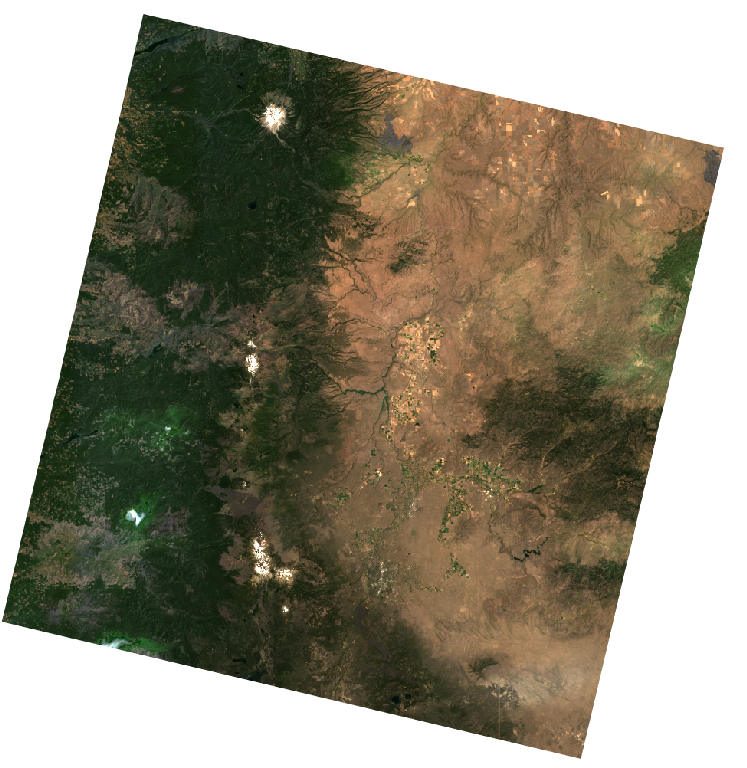

In [5]:
image_url = landsat_img.select(['SR_B4', 'SR_B3', 'SR_B2'])\
    .multiply([0.0000275, 0.0000275, 0.0000275])\
    .add([-0.2, -0.2, -0.2])\
    .getThumbURL({'min': 0.0, 'max': 0.23, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### Run model

In [6]:
# Build the RADET object from the Landsat image
model_obj = model.Image.from_landsat_c2_sr(
    landsat_img,
    meteorology_source_daily='IDAHO_EPSCOR/GRIDMET', 
    et_reference_source='IDAHO_EPSCOR/GRIDMET', 
    # et_reference_source='projects/openet/assets/meteorology/era5land/na/daily', 
    et_reference_band='etr', 
    et_reference_resample='bilinear',
)

### NDVI

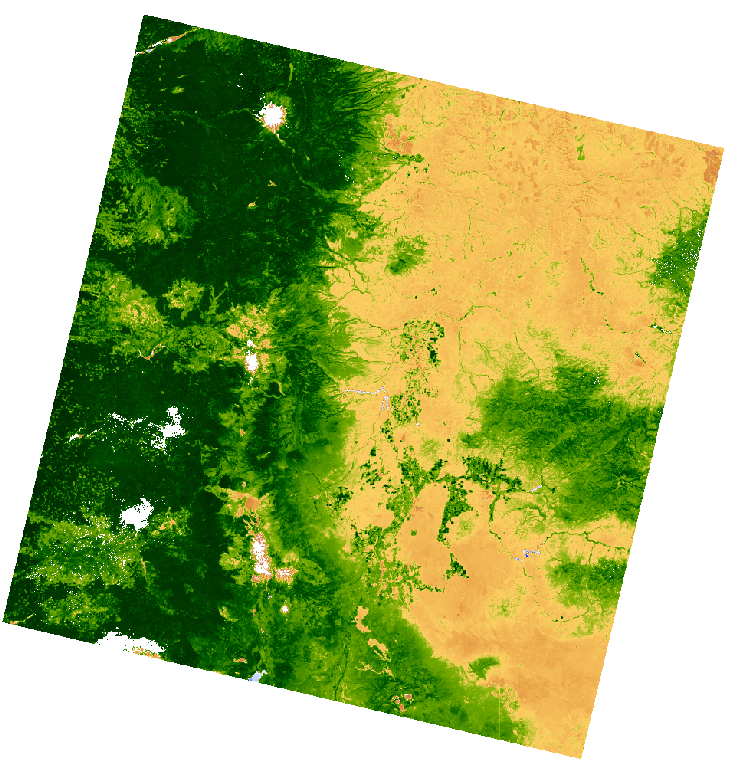

In [7]:
image_url = model_obj.ndvi\
    .getThumbURL({'min': -1, 'max': 1, 'palette': ndvi_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### LST

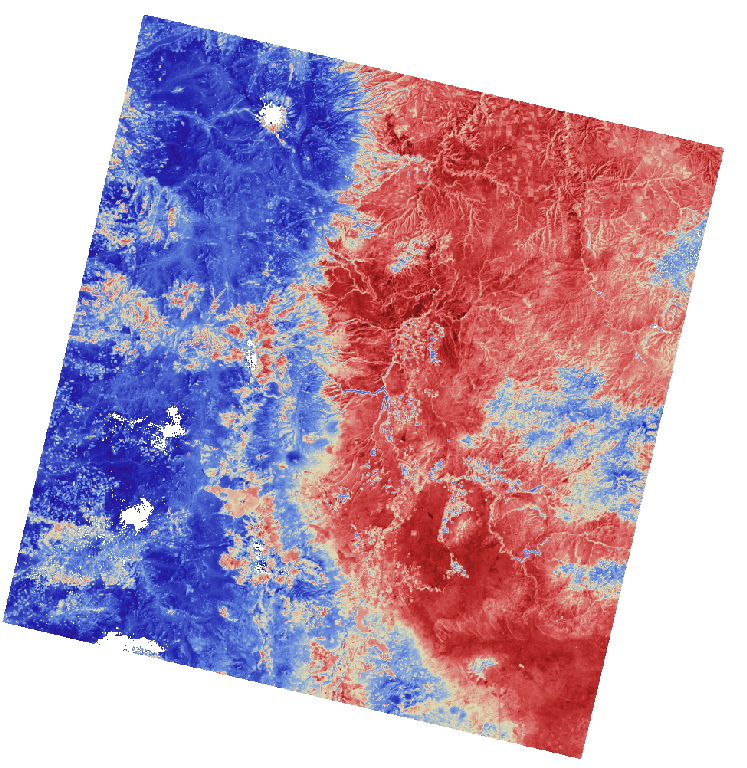

In [8]:
image_url = model_obj.lst\
    .getThumbURL({'min': 15+273.15, 'max': 55+273.15, 'palette':temp_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### ET

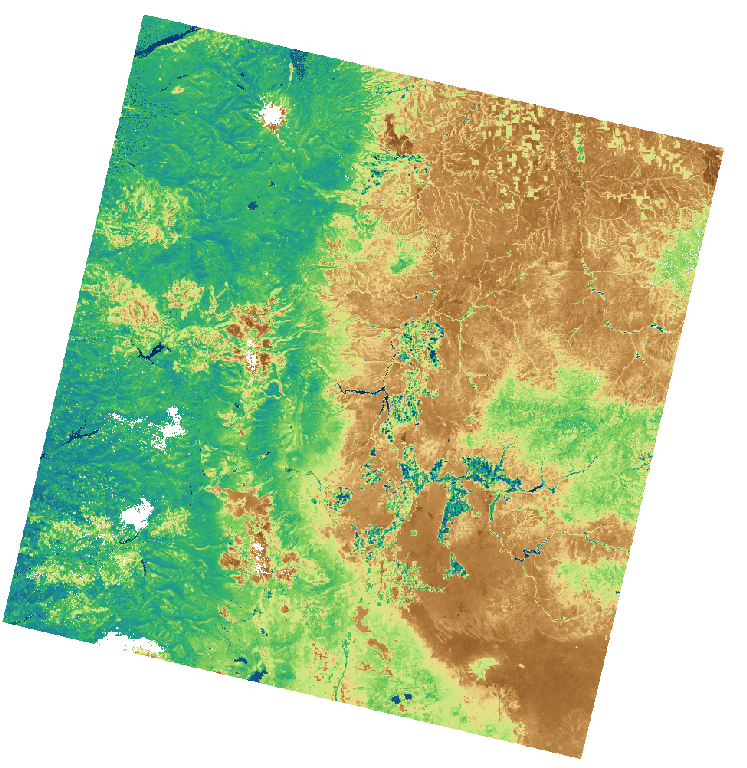

In [9]:
image_url = model_obj.et\
    .getThumbURL({'min': 0.0, 'max': 6.5, 'palette': et_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')